In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transformer-preprocessed-dataset/File5.csv


### **Transformer Darts Implementation**

In [2]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.7/884.7 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 6.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
import warnings

warnings.filterwarnings('ignore')

2024-06-07 03:57:19.925615: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 03:57:19.925779: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 03:57:20.098982: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
from darts import concatenate
from darts.models import NBEATSModel, TransformerModel
from darts.dataprocessing.transformers import Scaler
from darts.timeseries import TimeSeries
from darts.metrics import mape, r2_score

In [5]:
import torch

In [6]:
st = StandardScaler()
le = LabelEncoder()
minmax = MinMaxScaler(feature_range = (-1,1))

In [7]:
df=pd.read_csv('/kaggle/input/transformer-preprocessed-dataset/File5.csv', encoding='utf-8')

In [8]:
df

,Date_Time,Sid,Did,Station_Pair,Year,Month,Is_Holiday,Holiday_Type,OneHourSlot,Weekday,Passenger_Count
0,2018-06-01 00:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,1,4,0.0
1,2018-06-01 01:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,2,4,0.0
2,2018-06-01 02:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,3,4,0.0
3,2018-06-01 03:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,4,4,0.0
4,2018-06-01 04:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,5,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1755211,2024-04-20 19:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,20,5,0.0
1755212,2024-04-20 20:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,21,5,0.0
1755213,2024-04-20 21:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,22,5,0.0
1755214,2024-04-20 22:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,23,5,0.0


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

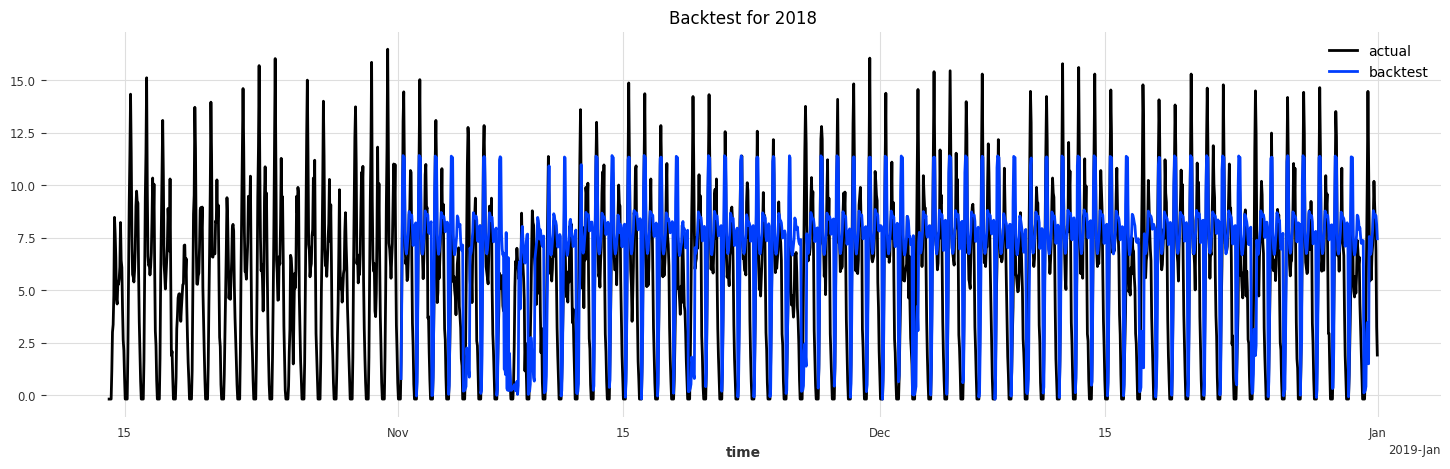

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

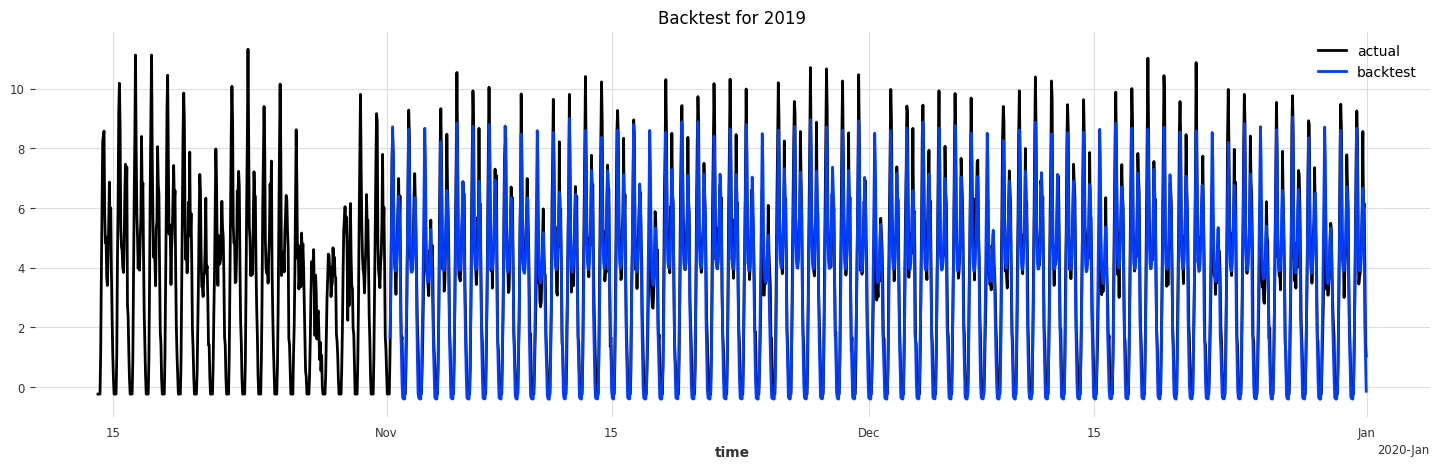

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

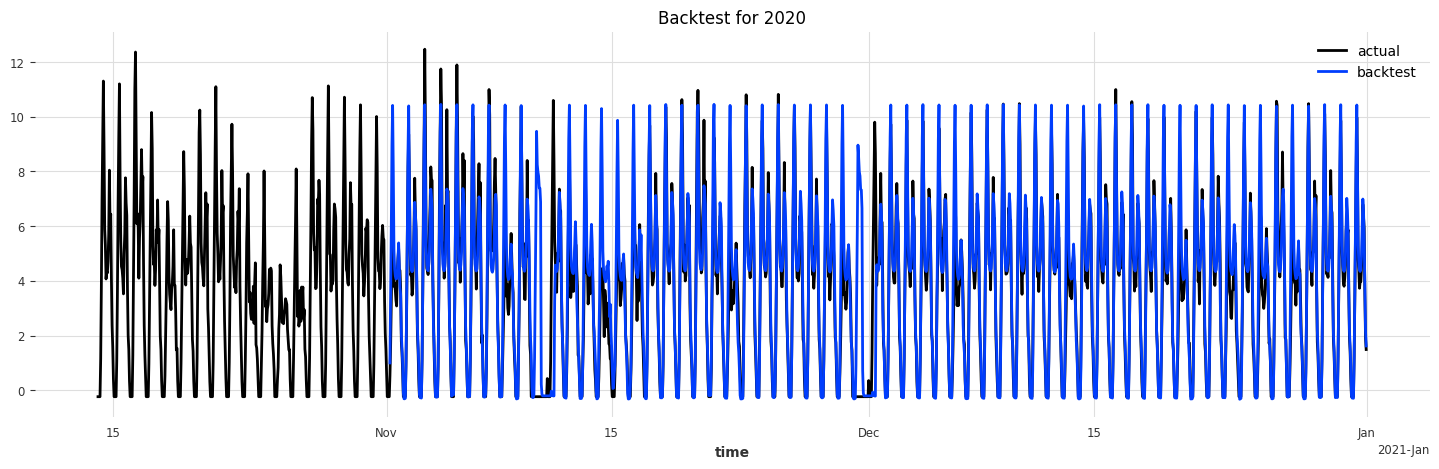

In [9]:
# Create a list of unique years
years = [2018, 2019, 2020]

# Iterate over each year
for year in years:
    # Filter the DataFrame for the current year
    hour = df[df['Year'] == year]
    hour.set_index('Date_Time', inplace=True)
    hour.index = pd.to_datetime(hour.index)
    hour['Date'], hour['Time'] = hour.index.date, hour.index.time

    # Create a copy of the DataFrame
    hour_copy = hour.copy()

    # Encoding station pairs using labelencoder
    hour['station_pair_encoded'] = le.fit_transform(hour['Station_Pair'])
    hour.drop(['Station_Pair'], axis=1, inplace=True)
    hour.drop(['Date', 'Time'], axis=1, inplace=True)

    # Encode features
    encode_features = ['Sid', 'Did', 'Is_Holiday', 'Holiday_Type', 'Weekday', 'OneHourSlot']
    for feature in encode_features:
        hour[feature] = le.fit_transform(hour[feature])

    # Scale features
    for feature in encode_features:
        hour[feature] = minmax.fit_transform(hour[feature].values.reshape(-1,1))

    # Scale leftover features
    leftover_features = ['station_pair_encoded', 'Passenger_Count']
    for feature in leftover_features:
        hour[feature] = st.fit_transform(hour[feature].values.reshape(-1,1))

    # Resampling and Interpolation
    hour_values = hour[['Passenger_Count']]
    hour_values.interpolate(method='polynomial', order=2, inplace=True, axis=0)
    hour_values = hour_values.resample('H').max().ffill()

    # Create a TimeSeries object
    data = hour_values.copy().astype(np.float32)

    # Split the data into training and validation sets
    time_series = TimeSeries.from_dataframe(data, fill_missing_dates=True)
    train_scaled, val_scaled = time_series.split_after(pd.Timestamp(f'{year}1014'))

    # Create and fit the TransformerModel
    transformer_model = TransformerModel(
        input_chunk_length=12,
        output_chunk_length=1,
        batch_size=32,
        n_epochs=10,
        nhead=8,
        num_encoder_layers=2,
        num_decoder_layers=2,
        dim_feedforward=128,
        dropout=0.1,
        activation="relu",
        random_state=42,
        force_reset=True,
    )
    transformer_model.fit(series=train_scaled, val_series=val_scaled, verbose=True)

    # Make historical forecasts
    backtest_features = transformer_model.historical_forecasts(
        series=time_series,
        start=pd.Timestamp(f'{year}1101'),
        forecast_horizon=6,
        retrain=False,
        verbose=True
    )
    
     # Create a figure for the current year
    plt.figure(figsize=(18, 5))

    # Plot the actual and backtest values for the current year
    val_scaled.plot(label="actual", lw=2)
    backtest_features.plot(label="backtest", lw=2)
    plt.legend()
    plt.title(f"Backtest for {year}")
    plt.show()

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

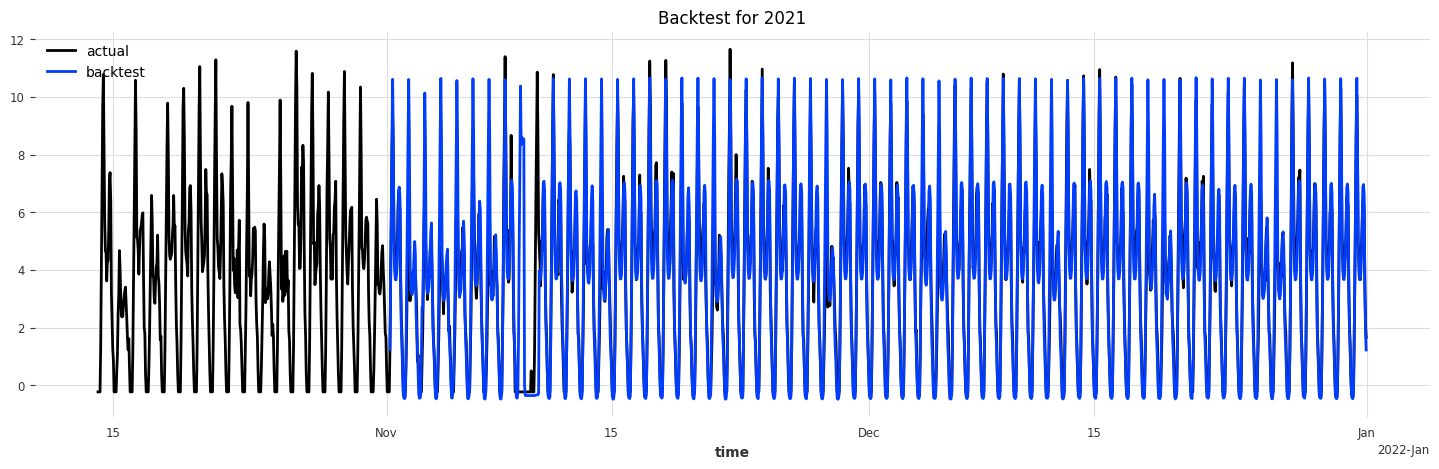

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

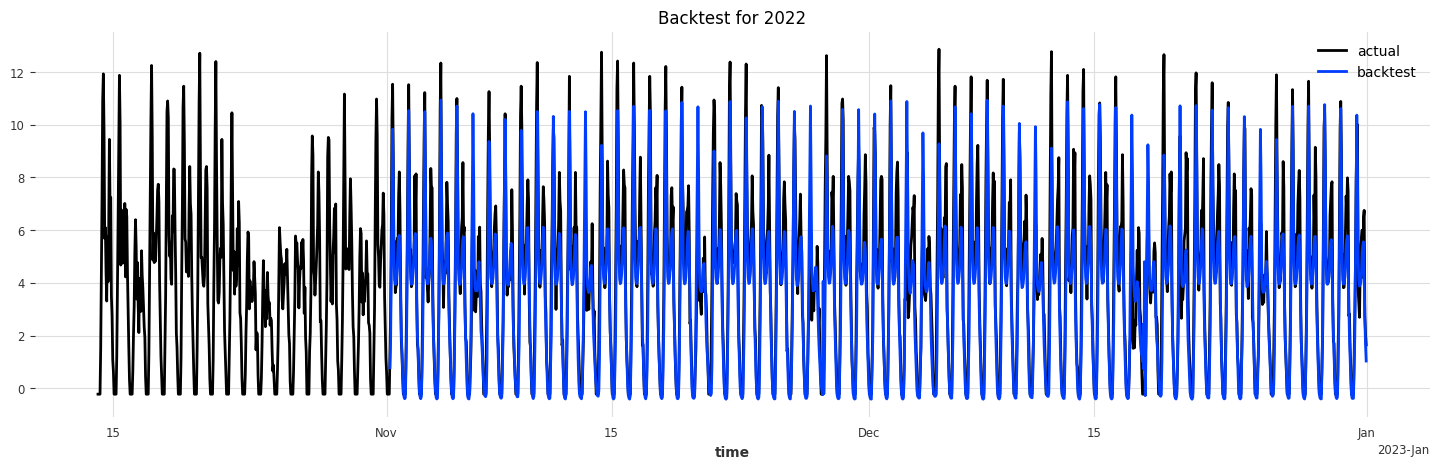

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

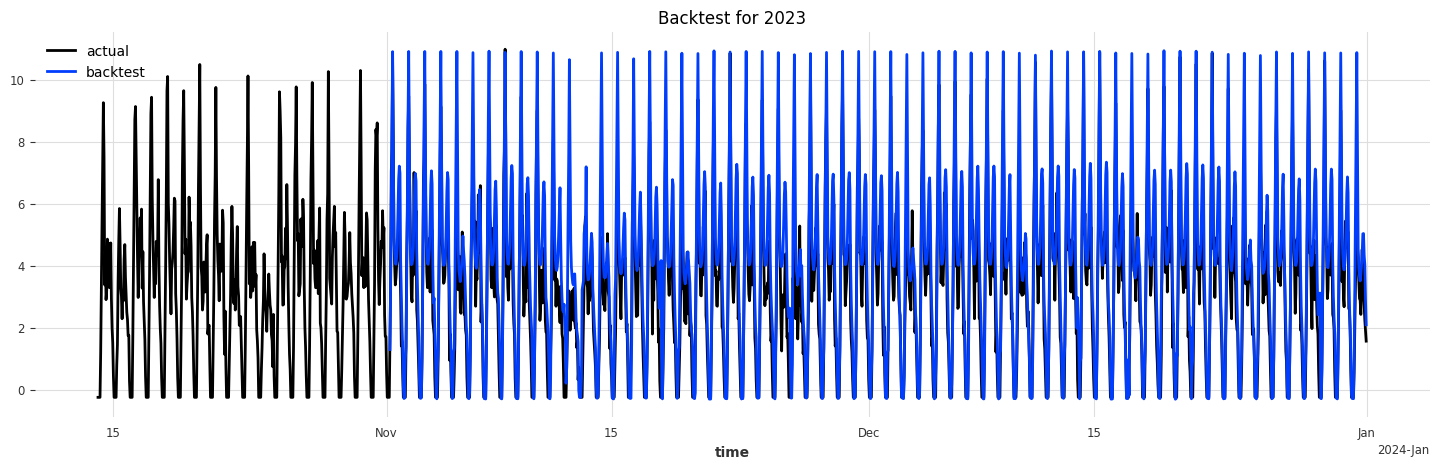

In [10]:
# Create a list of unique years
years = [2021, 2022, 2023]

# Iterate over each year
for year in years:
    # Filter the DataFrame for the current year
    hour = df[df['Year'] == year]
    hour.set_index('Date_Time', inplace=True)
    hour.index = pd.to_datetime(hour.index)
    hour['Date'], hour['Time'] = hour.index.date, hour.index.time

    # Create a copy of the DataFrame
    hour_copy = hour.copy()

    # Encoding station pairs using labelencoder
    hour['station_pair_encoded'] = le.fit_transform(hour['Station_Pair'])
    hour.drop(['Station_Pair'], axis=1, inplace=True)
    hour.drop(['Date', 'Time'], axis=1, inplace=True)

    # Encode features
    encode_features = ['Sid', 'Did', 'Is_Holiday', 'Holiday_Type', 'Weekday', 'OneHourSlot']
    for feature in encode_features:
        hour[feature] = le.fit_transform(hour[feature])

    # Scale features
    for feature in encode_features:
        hour[feature] = minmax.fit_transform(hour[feature].values.reshape(-1,1))

    # Scale leftover features
    leftover_features = ['station_pair_encoded', 'Passenger_Count']
    for feature in leftover_features:
        hour[feature] = st.fit_transform(hour[feature].values.reshape(-1,1))

    # Resampling and Interpolation
    hour_values = hour[['Passenger_Count']]
    hour_values.interpolate(method='polynomial', order=2, inplace=True, axis=0)
    hour_values = hour_values.resample('H').max().ffill()

    # Create a TimeSeries object
    data = hour_values.copy().astype(np.float32)

    # Split the data into training and validation sets
    time_series = TimeSeries.from_dataframe(data, fill_missing_dates=True)
    train_scaled, val_scaled = time_series.split_after(pd.Timestamp(f'{year}1014'))

    # Create and fit the TransformerModel
    transformer_model = TransformerModel(
        input_chunk_length=12,
        output_chunk_length=1,
        batch_size=32,
        n_epochs=10,
        nhead=8,
        num_encoder_layers=2,
        num_decoder_layers=2,
        dim_feedforward=128,
        dropout=0.1,
        activation="relu",
        random_state=42,
        force_reset=True,
    )
    transformer_model.fit(series=train_scaled, val_series=val_scaled, verbose=True)

    # Make historical forecasts
    backtest_features = transformer_model.historical_forecasts(
        series=time_series,
        start=pd.Timestamp(f'{year}1101'),
        forecast_horizon=6,
        retrain=False,
        verbose=True
    )
    
     # Create a figure for the current year
    plt.figure(figsize=(18, 5))

    # Plot the actual and backtest values for the current year
    val_scaled.plot(label="actual", lw=2)
    backtest_features.plot(label="backtest", lw=2)
    plt.legend()
    plt.title(f"Backtest for {year}")
    plt.show()

In [11]:
hour2024 = df[df['Year'] == 2024]
hour2024.set_index('Date_Time', inplace=True)
hour2024.index = pd.to_datetime(hour2024.index)
hour2024['Date'], hour2024['Time'] = hour2024.index.date, hour2024.index.time

In [12]:
hour2024_copy = hour2024.copy()

In [13]:
## Encoding station pairs using labelencoder

hour2024['station_pair_encoded'] = le.fit_transform(hour2024['Station_Pair'])
hour2024.drop(['Station_Pair'], axis=1, inplace=True)
# hour2022.drop(['Year'], axis=1, inplace=True)
hour2024.drop(['Date', 'Time'], axis=1, inplace=True)

In [14]:
encode_features = ['Sid', 'Did', 'Is_Holiday', 'Holiday_Type', 'Weekday', 'OneHourSlot']

for feature in encode_features:
    hour2024[feature] = le.fit_transform(hour2024[feature])

for feature in encode_features:
    hour2024[feature] = minmax.fit_transform(hour2024[feature].values.reshape(-1,1))

In [15]:
leftover_features = ['station_pair_encoded', 'Passenger_Count']

for feature in leftover_features:
    hour2024[feature] = st.fit_transform(hour2024[feature].values.reshape(-1,1))

In [16]:
## Resampling and Interpolation

hour2024_values = hour2024[['Passenger_Count']]
hour2024_values.interpolate(method='polynomial', order=2, inplace=True, axis=0)

In [17]:
hour2024_values = hour2024_values.resample('H').max().ffill()

In [18]:
data2024 = hour2024[['Passenger_Count']].copy().astype(np.float32)

In [19]:
data2024=data2024.resample('H').mean().ffill()

series=TimeSeries.from_dataframe(data2024, fill_missing_dates=True)

train, val = series.split_after(pd.Timestamp('2024-04-01'))

scaler=Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.fit_transform(val)
series_scaled = scaler.fit_transform(series)

In [20]:
transformer_model = TransformerModel(
    input_chunk_length=12,
    output_chunk_length=1,
    batch_size=32,
    n_epochs=10,
    nhead=8,
    num_encoder_layers=2,
    num_decoder_layers=2,
    dim_feedforward=128,
    dropout=0.1,
    activation="relu",
    random_state=42,
    force_reset=True,
)

In [21]:
transformer_model.fit(series = train_scaled, val_series = val_scaled, verbose = True)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

TransformerModel(output_chunk_shift=0, d_model=64, nhead=8, num_encoder_layers=2, num_decoder_layers=2, dim_feedforward=128, dropout=0.1, activation=relu, norm_type=None, custom_encoder=None, custom_decoder=None, input_chunk_length=12, output_chunk_length=1, batch_size=32, n_epochs=10, random_state=42, force_reset=True)

In [22]:
backtest_features = transformer_model.historical_forecasts(
    series = series_scaled,
    start = pd.Timestamp("2024-04-01"),
    forecast_horizon = 6,
    retrain = False,
    verbose = True
)

Predicting: |          | 0/? [00:00<?, ?it/s]

Text(0.5, 1.0, 'Backtest for 2024')

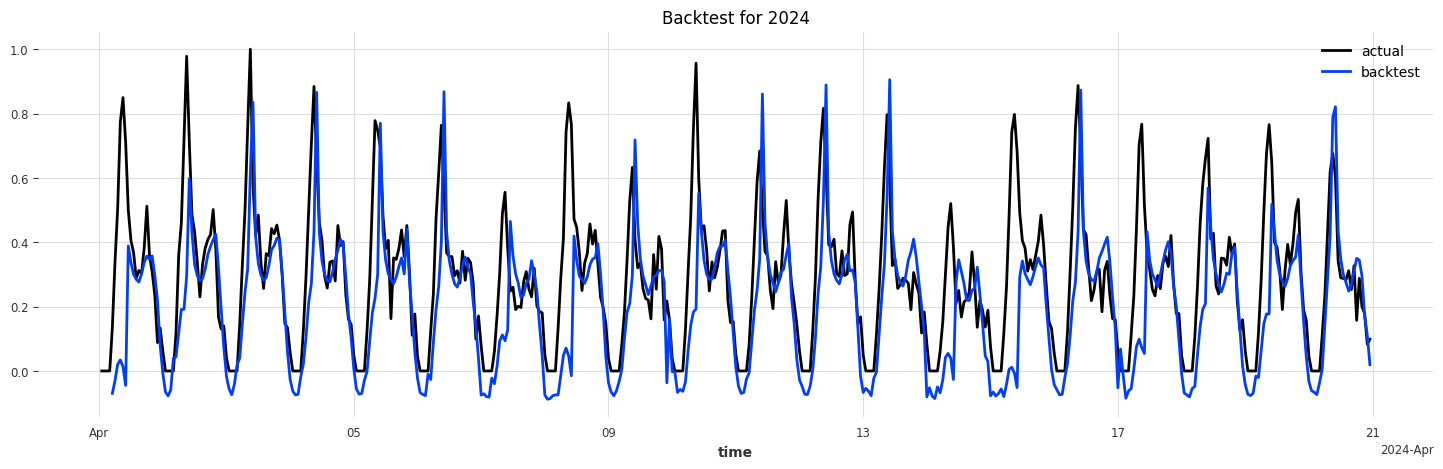

In [23]:
plt.figure(figsize=(18, 5))
val_scaled.plot(label="actual", lw=2)
backtest_features.plot(label="backtest", lw=2)
plt.legend()
plt.title("Backtest for 2024")

### for input chunk length = 24

training and saving the model

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

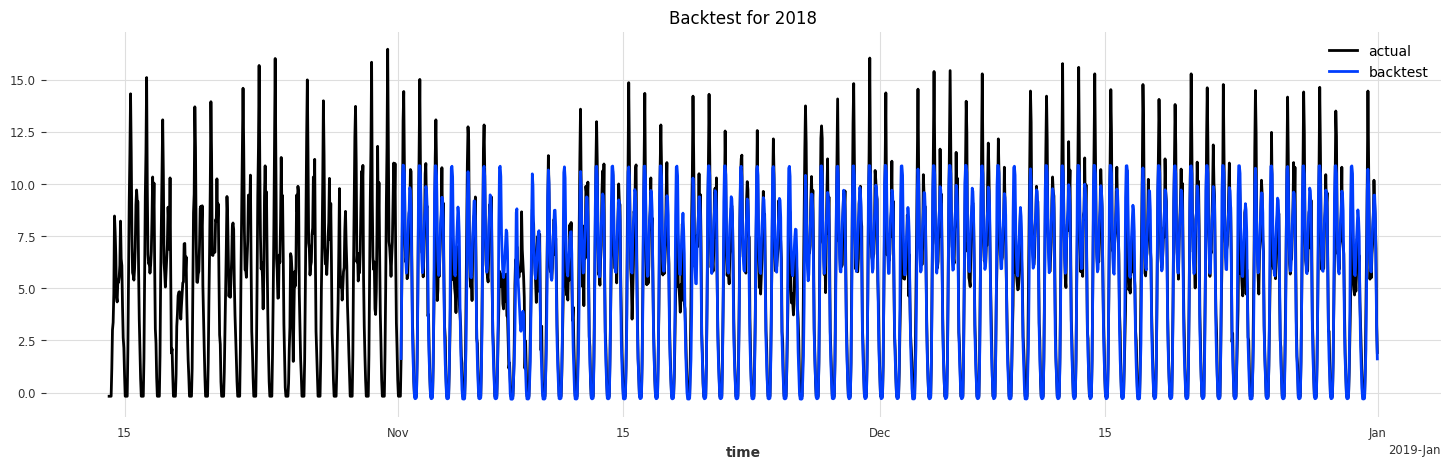

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

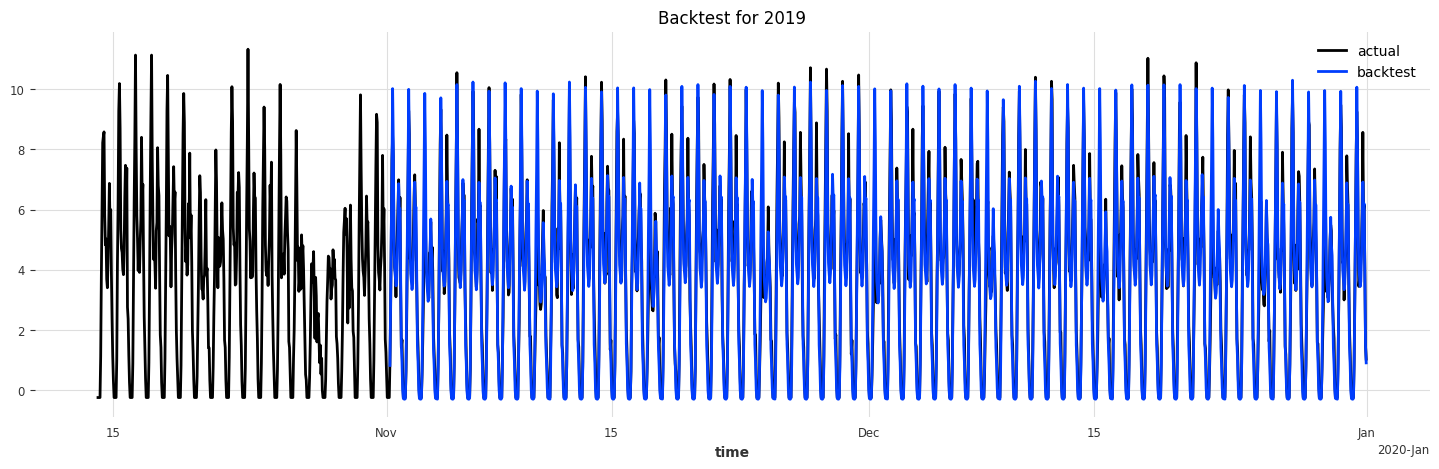

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

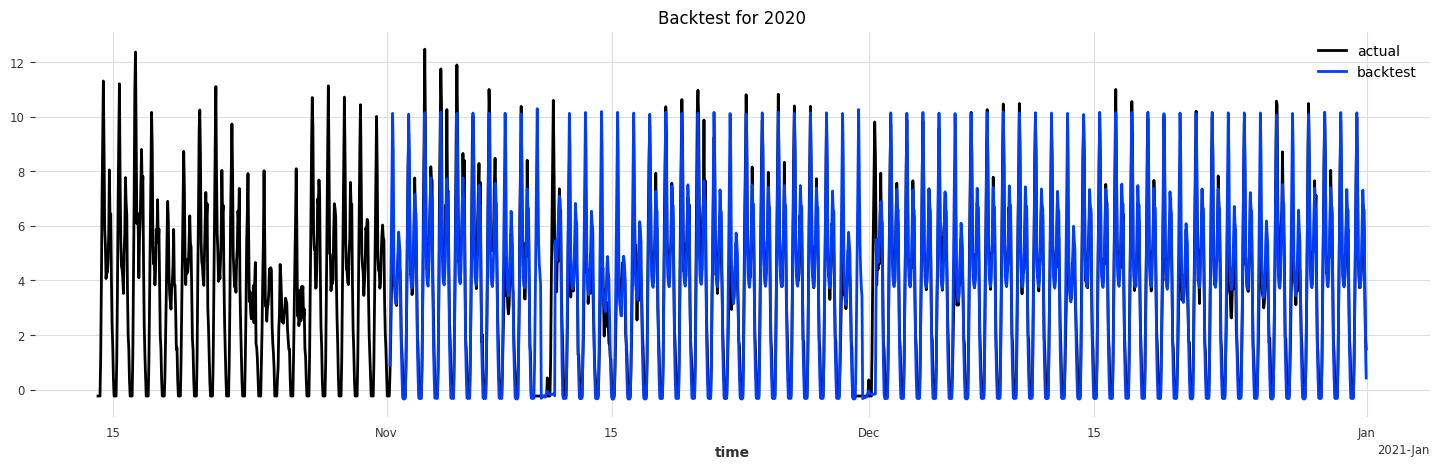

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

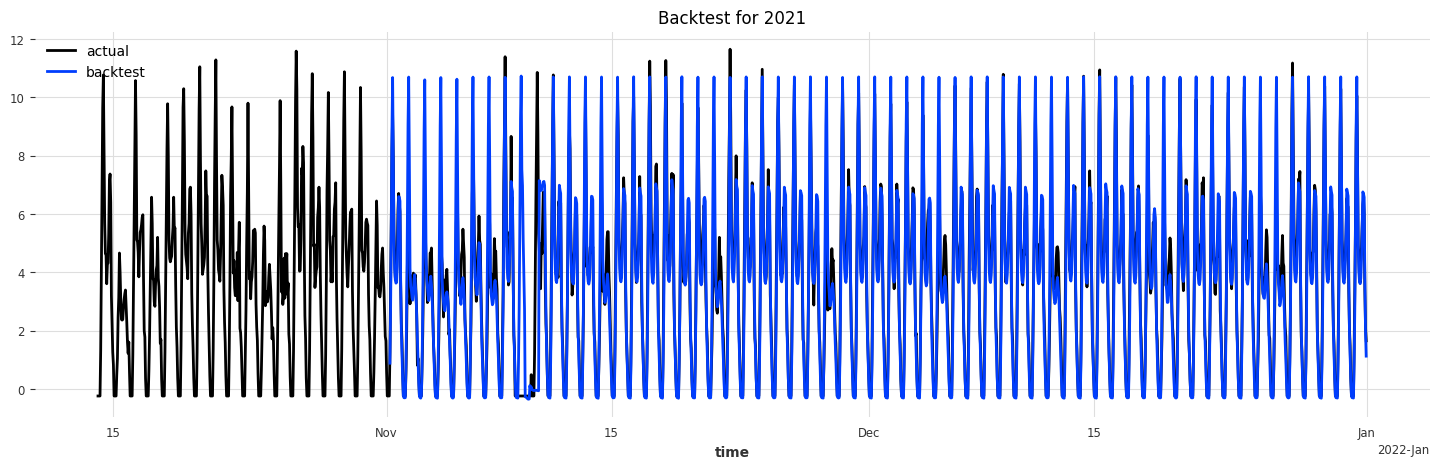

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

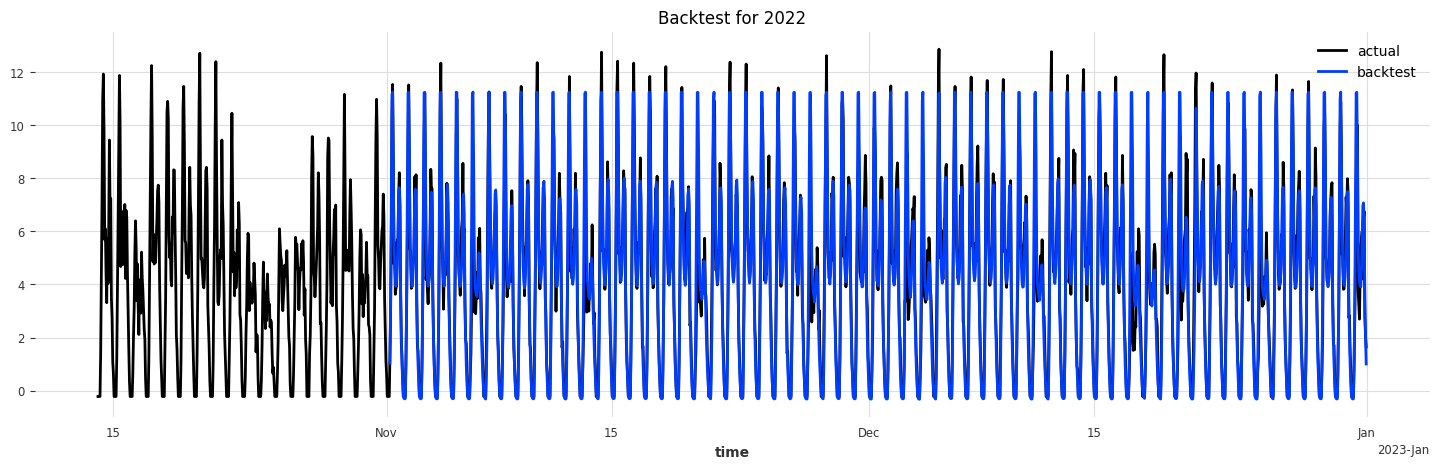

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

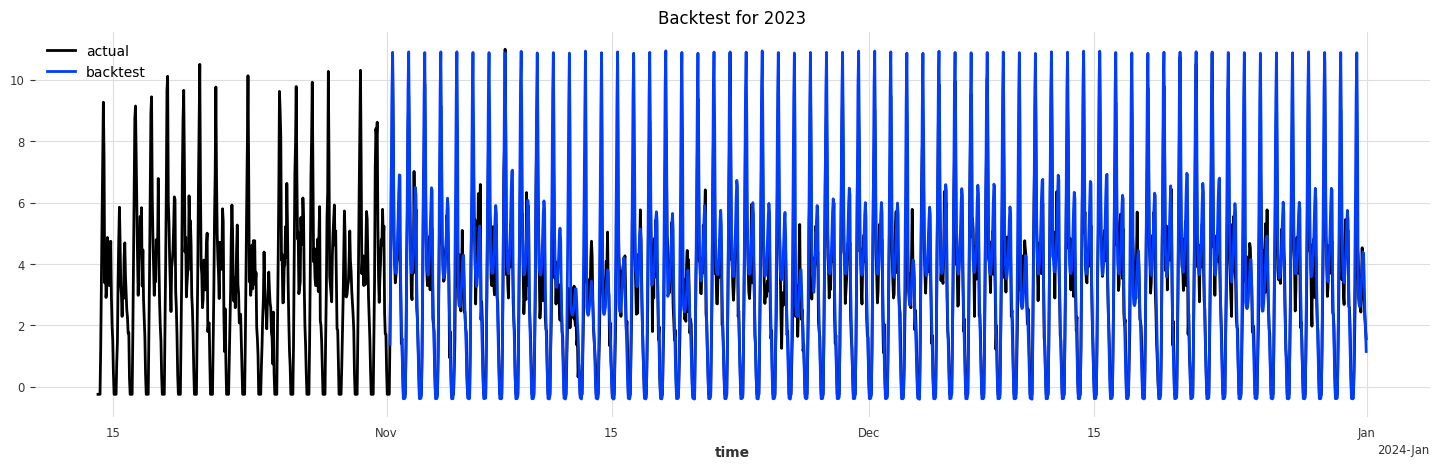

In [24]:
import joblib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from darts import TimeSeries
from darts.models import TransformerModel
import seaborn as sns


# Create directories to save models and forecasts
os.makedirs('models', exist_ok=True)
os.makedirs('forecasts', exist_ok=True)

# Create a list of unique years
years = [2018, 2019, 2020, 2021, 2022, 2023]

# Iterate over each year
for year in years:
    # Filter the DataFrame for the current year
    hour = df[df['Year'] == year]
    hour.set_index('Date_Time', inplace=True)
    hour.index = pd.to_datetime(hour.index)
    hour['Date'], hour['Time'] = hour.index.date, hour.index.time

    # Create a copy of the DataFrame
    hour_copy = hour.copy()

    # Encoding station pairs using labelencoder
    hour['station_pair_encoded'] = le.fit_transform(hour['Station_Pair'])
    hour.drop(['Station_Pair'], axis=1, inplace=True)
    hour.drop(['Date', 'Time'], axis=1, inplace=True)

    # Encode features
    encode_features = ['Sid', 'Did', 'Is_Holiday', 'Holiday_Type', 'Weekday', 'OneHourSlot']
    for feature in encode_features:
        hour[feature] = le.fit_transform(hour[feature])

    # Scale features
    for feature in encode_features:
        hour[feature] = minmax.fit_transform(hour[feature].values.reshape(-1,1))

    # Scale leftover features
    leftover_features = ['station_pair_encoded', 'Passenger_Count']
    for feature in leftover_features:
        hour[feature] = st.fit_transform(hour[feature].values.reshape(-1,1))

    # Resampling and Interpolation
    hour_values = hour[['Passenger_Count']]
    hour_values.interpolate(method='polynomial', order=2, inplace=True, axis=0)
    hour_values = hour_values.resample('H').max().ffill()

    # Create a TimeSeries object
    data = hour_values.copy().astype(np.float32)

    # Split the data into training and validation sets
    time_series = TimeSeries.from_dataframe(data, fill_missing_dates=True)
    train_scaled, val_scaled = time_series.split_after(pd.Timestamp(f'{year}1014'))

    # Create and fit the TransformerModel
    transformer_model = TransformerModel(
        input_chunk_length=24,
        output_chunk_length=1,
        batch_size=32,
        n_epochs=10,
        nhead=8,
        num_encoder_layers=2,
        num_decoder_layers=2,
        dim_feedforward=128,
        dropout=0.1,
        activation="relu",
        random_state=42,
        force_reset=True,
    )
    transformer_model.fit(series=train_scaled, val_series=val_scaled, verbose=True)

    # Save the trained model
    joblib.dump(transformer_model, f'models/transformer_model_{year}.pkl')

    # Make historical forecasts
    backtest_features = transformer_model.historical_forecasts(
        series=time_series,
        start=pd.Timestamp(f'{year}1101'),
        forecast_horizon=6,
        retrain=False,
        verbose=True
    )

    # Save the forecasts and validation data
    backtest_features.to_csv(f'forecasts/backtest_features_{year}.csv')
    val_scaled.to_csv(f'forecasts/val_scaled_{year}.csv')
    
    # Create a figure for the current year
    plt.figure(figsize=(18, 5))

    # Plot the actual and backtest values for the current year
    val_scaled.plot(label="actual", lw=2)
    backtest_features.plot(label="backtest", lw=2)
    plt.legend()
    plt.title(f"Backtest for {year}")
    plt.show()
